<a href="https://colab.research.google.com/github/rendrasatriar/Density-SILO/blob/Bintangor/Bintangor_SAP_ESAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
!pip install --quiet google-cloud-bigquery pandas pyarrow

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [288]:
from google.cloud import bigquery
import pandas as pd

PROJECT_ID = "study-density-silo"
DATASET_ID = "study_density"
TABLE_ID = "raw_data_bintangor"

client = bigquery.Client(project=PROJECT_ID)

def fetch_single_block(project: str, dataset: str, table_id: str, max_rows: int = None) -> pd.DataFrame:
    table_full = f"{project}.{dataset}.{table_id}"
    query = f"SELECT * FROM `{table_full}`"
    job = client.query(query)
    if max_rows:
        return job.result(max_results=max_rows).to_dataframe()
    return job.to_dataframe()

In [289]:
# --- Ambil data satu blok ---
df_block = fetch_single_block(PROJECT_ID, DATASET_ID, TABLE_ID)
print(f"Loaded table: {PROJECT_ID}.{DATASET_ID}.{TABLE_ID}")
print("Rows:", len(df_block))
print("Columns:", len(df_block.columns))
print("Shape:", df_block.shape)
print("-" * 60)

# --- Informasi kolom dan tipe data ---
print("\nColumn info:")
print(df_block.dtypes)
print("\nMemory usage (MB):")
print(df_block.memory_usage(deep=True).sum() / 1024**2)

# --- Statistik numerik singkat ---
print("\nDescriptive statistics (numeric columns):")
display(df_block.describe().transpose())

# --- Distribusi kategori penting ---
if 'GEN_LYR' in df_block.columns:
    print("\nUnique GEN_LYR count:", df_block['GEN_LYR'].nunique())
    print("Top GEN_LYR value counts:")
    display(df_block['GEN_LYR'].value_counts().head(20))

if 'Material' in df_block.columns:
    print("\nUnique Material count:", df_block['Material'].nunique())
    print("Top Material value counts:")
    display(df_block['Material'].value_counts().head(20))

# --- Quick QAQC checks ---
print("\nQAQC checks:")
if {'Interval','From','To'}.issubset(df_block.columns):
    n_bad_interval = len(df_block[(df_block['Interval'] <= 0) | (df_block['To'] <= df_block['From'])])
    print("Rows with Interval <= 0 or To <= From:", n_bad_interval)
else:
    print("Columns Interval/From/To not all present for QAQC checks.")

Loaded table: study-density-silo.study_density.raw_data_bintangor
Rows: 11548
Columns: 16
Shape: (11548, 16)
------------------------------------------------------------

Column info:
HoleId         object
Hill           object
Hill_Group     object
From          float64
To            float64
Interval      float64
CoreRec       float64
WetW          float64
H2O           float64
DryW          float64
Material       object
Layer          object
NEW_LYR        object
GEN_LYR        object
WTF           float64
DTF           float64
dtype: object

Memory usage (MB):
4.864101409912109

Descriptive statistics (numeric columns):


,count,mean,std,min,25%,50%,75%,max
From,11548.0,5.680615,3.949815,0.000000,2.600000,5.075000,8.000000,23.000000
To,11548.0,6.448785,3.934414,0.200000,3.000000,6.000000,9.000000,23.900000
Interval,11548.0,0.768170,0.290259,0.050000,0.500000,1.000000,1.000000,3.000000
CoreRec,11548.0,1.081167,0.188022,0.200000,1.000000,1.000000,1.090000,3.500000
WetW,11548.0,4.179988,1.862441,0.400000,2.640000,4.259500,5.515000,13.340000
H2O,11548.0,25.032835,14.841084,0.079000,12.402250,25.364500,36.083250,90.147000
DryW,11548.0,3.181767,1.628951,0.156000,1.835000,3.057500,4.336000,11.840000
WTF,11548.0,1.756388,0.571895,0.195304,1.489770,1.723069,1.953043,23.925631
DTF,11548.0,1.335409,0.587918,0.123134,0.992927,1.266640,1.612504,22.471965



Unique GEN_LYR count: 5
Top GEN_LYR value counts:


,count
GEN_LYR,
LIM,5803
BRK,2925
SAP,2291
SAPX,312
LIMX,217



Unique Material count: 50
Top Material value counts:


,count
Material,
YLIM,2423
Rlim,1583
ESAP,1572
HGT,933
HSAP,882
RSAP,831
Sap,700
RLIM,380
DNT,365



QAQC checks:
Rows with Interval <= 0 or To <= From: 0


# Filter By GEN_LYR dan Material

In [344]:

gen_lyr_input = input("Masukkan GEN_LYR yang ingin difilter: ").strip()
material_input = input("Masukkan Material yang ingin difilter: ").strip()

df_filtered = df_block.copy()

if 'GEN_LYR' in df_filtered.columns:
    df_filtered = df_filtered[df_filtered['GEN_LYR'].str.upper() == gen_lyr_input.upper()]

if 'Material' in df_filtered.columns:
    df_filtered = df_filtered[df_filtered['Material'].str.upper() == material_input.upper()]

print(f"\nFiltered rows: {len(df_filtered)}")
display(df_filtered.head(133))

Masukkan GEN_LYR yang ingin difilter: SAP
Masukkan Material yang ingin difilter: ESAP

Filtered rows: 621


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
966,CS7210118,Bintangor Blok 2 Spasi 50,BINTANGOR,1.0,1.35,0.35,1.0,1.272,48.270,0.658,ESAP,None,ESAP,SAP,1.243068,0.643033
972,CD500074,BINTANGOR BARAT UTARA,BINTANGOR,1.0,1.75,0.75,1.0,2.979,41.793,1.734,ESAP,None,ESAP,SAP,1.358579,0.790794
1953,CS7210119,Bintangor Blok 2 Spasi 50,BINTANGOR,1.9,2.10,0.20,1.0,0.678,50.442,0.336,ESAP,None,ESAP,SAP,1.159512,0.574626
1963,CD500080,BINTANGOR BARAT UTARA,BINTANGOR,2.0,2.20,0.20,1.0,0.633,42.338,0.365,ESAP,None,ESAP,SAP,1.082554,0.624221
1964,CD500090,BINTANGOR BARAT UTARA,BINTANGOR,2.0,2.65,0.65,1.0,2.815,37.300,1.765,ESAP,None,ESAP,SAP,1.481292,0.928768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5194,CS7210151,Bintangor Blok 1 Spasi 50,BINTANGOR,5.0,5.50,0.50,1.0,1.940,51.031,0.950,ESAP,None,ESAP,SAP,1.327111,0.649874
5195,CD500030,BINTANGOR BARAT UTARA,BINTANGOR,5.0,6.00,1.00,1.0,4.588,36.421,2.917,ESAP,None,ESAP,SAP,1.569275,0.997728
5196,CD500082,BINTANGOR BARAT SELATAN,BINTANGOR,5.0,6.00,1.00,1.0,3.211,47.088,1.699,ESAP,None,ESAP,SAP,1.098287,0.581124
5197,CD500028R,BINTANGOR BARAT UTARA,BINTANGOR,5.0,5.55,0.55,1.0,1.865,20.804,1.477,ESAP,None,ESAP,SAP,1.159823,0.918530


# Filter By Interval

Descriptive statistics for Interval:
Count: 621
Mean: 0.632957
Standard Error: 0.011640
Median: 0.59
Mode: 1.0
Standard Deviation: 0.290065
Sample Variance: 0.084138
Kurtosis: -1.106573
Skewness: 0.252224
Range: 1.4
Minimum: 0.1
Maximum: 1.5
Sum: 393.066
Confidence Level (95%): ±0.022858

Bin calculation:
Freedman–Diaconis -> bins: 10, bin width: 0.140654
Sturges -> bins: 11, bin width: 0.127273


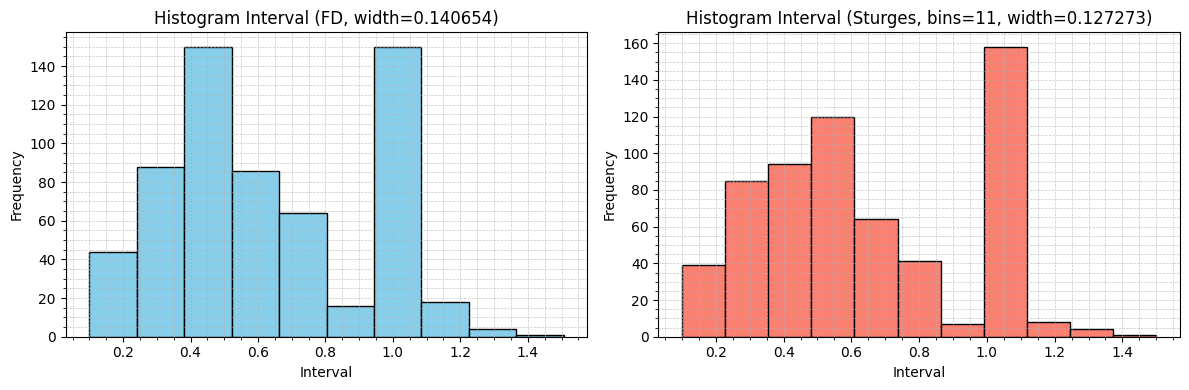


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.100000,0.240654,44
1,0.240654,0.381307,88
2,0.381307,0.521961,150
3,0.521961,0.662614,86
4,0.662614,0.803268,64
5,0.803268,0.943921,16
6,0.943921,1.084575,150
7,1.084575,1.225228,18
8,1.225228,1.365882,4
9,1.365882,1.506536,1



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.100000,0.227273,39
1,0.227273,0.354545,85
2,0.354545,0.481818,94
3,0.481818,0.609091,120
4,0.609091,0.736364,64
5,0.736364,0.863636,41
6,0.863636,0.990909,7
7,0.990909,1.118182,158
8,1.118182,1.245455,8
9,1.245455,1.372727,4


In [346]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import AutoMinorLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return int(np.sqrt(n)), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series):
    data = series.dropna().values
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    se = stats.sem(data)
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0] if n > 0 else None
    var = np.var(data, ddof=1)
    kurt = stats.kurtosis(data)
    skew = stats.skew(data)
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else None

    print("Descriptive statistics for Interval:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}")
    print(f"Sample Variance: {var:.6f}")
    print(f"Kurtosis: {kurt:.6f}")
    print(f"Skewness: {skew:.6f}")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): \u00b1{conf95:.6f}")

def plot_interval_histograms(df_filtered):
    if 'Interval' not in df_filtered.columns:
        print("Kolom 'Interval' tidak ada di dataframe.")
        return

    data = df_filtered['Interval'].dropna()

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data)

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins: {bins_fd}, bin width: {width_fd_str}")
    print(f"Sturges -> bins: {bins_st}, bin width: {width_st_str}")

    # --- plot histogram dengan minor ticks ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram Interval (FD, width={width_fd_str})")
    axes[0].set_xlabel("Interval")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(AutoMinorLocator())
    axes[0].yaxis.set_minor_locator(AutoMinorLocator())
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram Interval (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("Interval")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(AutoMinorLocator())
    axes[1].yaxis.set_minor_locator(AutoMinorLocator())
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
interval_data = plot_interval_histograms(df_filtered) # Corrected function call

In [347]:
# Pastikan df_filtered sudah ada
# Contoh: df_filtered = filter_data(df_block, "LIM", "RLIM")

# Minta input dari user
lower_bound = float(input("Masukkan batas bawah (is greater than or equal to): "))
upper_bound = float(input("Masukkan batas atas (is less than or equal to): "))

# Filter data sesuai input
df_interval = df_filtered[(df_filtered['Interval'] >= lower_bound) &
                       (df_filtered['Interval'] <= upper_bound)]

print(f"\nFiltered rows: {len(df_interval)}")
display(df_interval.head(50))

Masukkan batas bawah (is greater than or equal to): 0.100000
Masukkan batas atas (is less than or equal to): 0.863636

Filtered rows: 443


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
966,CS7210118,Bintangor Blok 2 Spasi 50,BINTANGOR,1.00,1.35,0.35,1.00,1.272,48.270,0.658,ESAP,None,ESAP,SAP,1.243068,0.643033
972,CD500074,BINTANGOR BARAT UTARA,BINTANGOR,1.00,1.75,0.75,1.00,2.979,41.793,1.734,ESAP,None,ESAP,SAP,1.358579,0.790794
1953,CS7210119,Bintangor Blok 2 Spasi 50,BINTANGOR,1.90,2.10,0.20,1.00,0.678,50.442,0.336,ESAP,None,ESAP,SAP,1.159512,0.574626
1963,CD500080,BINTANGOR BARAT UTARA,BINTANGOR,2.00,2.20,0.20,1.00,0.633,42.338,0.365,ESAP,None,ESAP,SAP,1.082554,0.624221
1964,CD500090,BINTANGOR BARAT UTARA,BINTANGOR,2.00,2.65,0.65,1.00,2.815,37.300,1.765,ESAP,None,ESAP,SAP,1.481292,0.928768
1969,CD500089,BINTANGOR BARAT UTARA,BINTANGOR,2.00,2.50,0.50,1.00,2.240,41.518,1.310,ESAP,None,ESAP,SAP,1.532335,0.896142
1970,CD500088,BINTANGOR BARAT UTARA,BINTANGOR,2.00,2.70,0.70,1.00,3.100,34.677,2.025,ESAP,None,ESAP,SAP,1.514744,0.989470
1971,CD500064,BINTANGOR BARAT UTARA,BINTANGOR,2.00,2.70,0.70,1.00,2.835,45.855,1.535,ESAP,None,ESAP,SAP,1.385258,0.750043
2699,CS7210353,Bintangor Blok 1 Spasi 50,BINTANGOR,2.00,2.50,0.50,1.00,2.140,30.374,1.490,ESAP,None,SAP,SAP,1.463927,1.019276
2742,CD500096,BINTANGOR BARAT UTARA,BINTANGOR,2.30,3.00,0.70,1.00,2.955,27.411,2.145,ESAP,None,ESAP,SAP,1.443893,1.048105


# Filter By Recovery


Descriptive statistics for CoreRec:
Count: 443
Mean: 1.149465
Standard Error: 0.011146
Median: 1.0
Mode: 1.0
Standard Deviation: 0.234586
Sample Variance: 0.055031
Kurtosis: 1.981099
Skewness: 1.531642
Range: 1.36
Minimum: 0.8
Maximum: 2.16
Sum: 509.2130000000001
Confidence Level (95%): ±0.021905

Bin calculation:
Freedman–Diaconis -> bins=18, width=0.078708
Sturges -> bins=10, width=0.136000


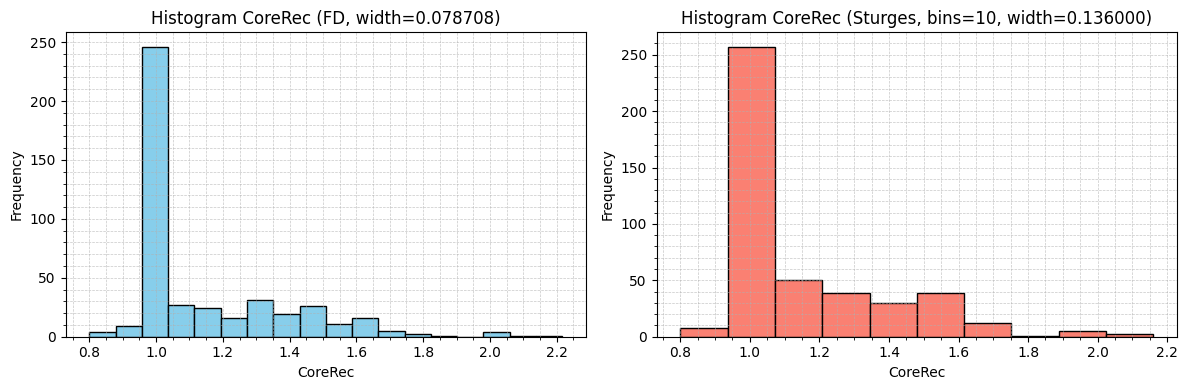


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.800000,0.878708,4
1,0.878708,0.957415,9
2,0.957415,1.036123,246
3,1.036123,1.114830,27
4,1.114830,1.193538,24
5,1.193538,1.272246,16
6,1.272246,1.350953,31
7,1.350953,1.429661,19
8,1.429661,1.508368,26
9,1.508368,1.587076,11



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.800,0.936,8
1,0.936,1.072,257
2,1.072,1.208,50
3,1.208,1.344,39
4,1.344,1.480,30
5,1.480,1.616,39
6,1.616,1.752,12
7,1.752,1.888,1
8,1.888,2.024,5
9,2.024,2.160,2


In [348]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import AutoMinorLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="CoreRec"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_coreRec(df_interval):
    if 'CoreRec' not in df_interval.columns:
        print("Kolom 'CoreRec' tidak ada di dataframe.")
        return

    data = df_interval['CoreRec'].dropna()
    if data.empty:
        print("Tidak ada data 'CoreRec' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="CoreRec")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram CoreRec (FD, width={width_fd_str})")
    axes[0].set_xlabel("CoreRec")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(AutoMinorLocator())
    axes[0].yaxis.set_minor_locator(AutoMinorLocator())
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram CoreRec (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("CoreRec")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(AutoMinorLocator())
    axes[1].yaxis.set_minor_locator(AutoMinorLocator())
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
coreRec_data = analyze_coreRec(df_interval)

In [349]:
lower_bound = float(input("Masukkan batas bawah (is greater than or equal to): "))
upper_bound = float(input("Masukkan batas atas (is less than or equal to): "))


df_recovery = df_interval[(df_interval['CoreRec'] >= lower_bound) &
                       (df_interval['CoreRec'] <= upper_bound)]

print(f"\nFiltered rows: {len(df_recovery)}")
display(df_recovery.head(47))

Masukkan batas bawah (is greater than or equal to): 0.936
Masukkan batas atas (is less than or equal to): 1.072

Filtered rows: 257


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF
966,CS7210118,Bintangor Blok 2 Spasi 50,BINTANGOR,1.00,1.35,0.35,1.00,1.272,48.270,0.658,ESAP,None,ESAP,SAP,1.243068,0.643033
972,CD500074,BINTANGOR BARAT UTARA,BINTANGOR,1.00,1.75,0.75,1.00,2.979,41.793,1.734,ESAP,None,ESAP,SAP,1.358579,0.790794
1953,CS7210119,Bintangor Blok 2 Spasi 50,BINTANGOR,1.90,2.10,0.20,1.00,0.678,50.442,0.336,ESAP,None,ESAP,SAP,1.159512,0.574626
1963,CD500080,BINTANGOR BARAT UTARA,BINTANGOR,2.00,2.20,0.20,1.00,0.633,42.338,0.365,ESAP,None,ESAP,SAP,1.082554,0.624221
1964,CD500090,BINTANGOR BARAT UTARA,BINTANGOR,2.00,2.65,0.65,1.00,2.815,37.300,1.765,ESAP,None,ESAP,SAP,1.481292,0.928768
1969,CD500089,BINTANGOR BARAT UTARA,BINTANGOR,2.00,2.50,0.50,1.00,2.240,41.518,1.310,ESAP,None,ESAP,SAP,1.532335,0.896142
1970,CD500088,BINTANGOR BARAT UTARA,BINTANGOR,2.00,2.70,0.70,1.00,3.100,34.677,2.025,ESAP,None,ESAP,SAP,1.514744,0.989470
1971,CD500064,BINTANGOR BARAT UTARA,BINTANGOR,2.00,2.70,0.70,1.00,2.835,45.855,1.535,ESAP,None,ESAP,SAP,1.385258,0.750043
2699,CS7210353,Bintangor Blok 1 Spasi 50,BINTANGOR,2.00,2.50,0.50,1.00,2.140,30.374,1.490,ESAP,None,SAP,SAP,1.463927,1.019276
2742,CD500096,BINTANGOR BARAT UTARA,BINTANGOR,2.30,3.00,0.70,1.00,2.955,27.411,2.145,ESAP,None,ESAP,SAP,1.443893,1.048105


# Filter By Wet Weight

Tidak ada data dengan Interval=1.0 dan CoreRec=1.0.
Menggunakan seluruh data sebagai acuan residual.

Residual IQR acuan:
Q1: -0.206, Q3: 0.155, IQR: 0.361
Lower margin: -0.747, Upper margin: 0.696


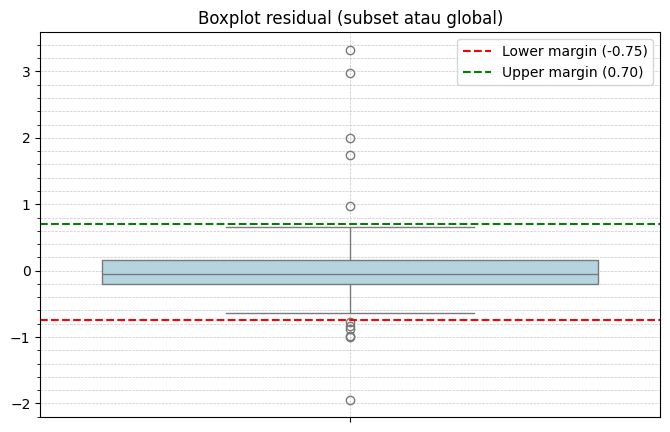

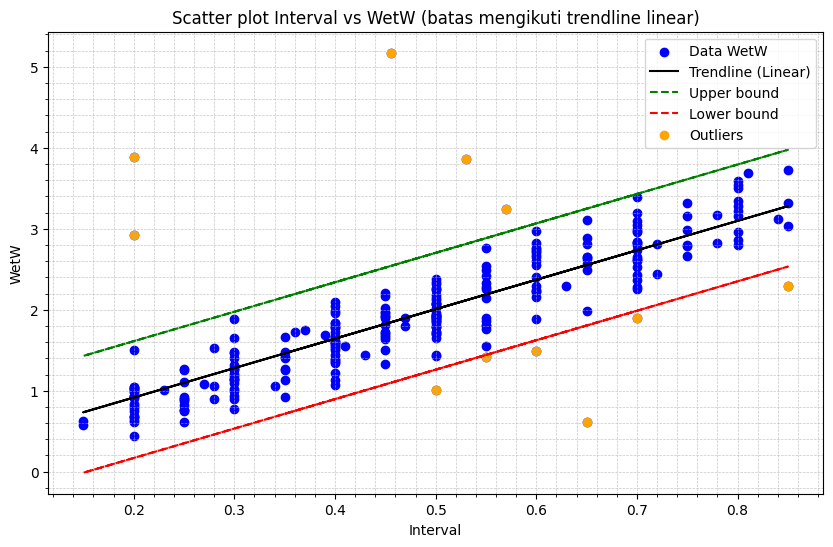


Outlier WetW berdasarkan trendline linear + IQR residual acuan:
         HoleId                       Hill Hill_Group  From     To  Interval  \
3715    CD03755      BINTANGOR BARAT UTARA  BINTANGOR  3.15  3.700     0.550   
3909  CS7210064  Bintangor Blok 2 Spasi 50  BINTANGOR  3.60  4.450     0.850   
4100   CD500119    BINTANGOR BARAT SELATAN  BINTANGOR  4.00  4.500     0.500   
5743   CD500084      BINTANGOR BARAT UTARA  BINTANGOR  5.00  5.456     0.456   
5962   CD500137    BINTANGOR BARAT SELATAN  BINTANGOR  5.47  6.000     0.530   

      CoreRec   WetW     H2O   DryW Material Layer NEW_LYR GEN_LYR       WTF  \
3715     1.00  1.415  21.908  1.105     ESAP  None    ESAP     SAP  0.879973   
3909     1.00  2.296  38.589  1.410     ESAP  None    ESAP     SAP  0.923908   
4100     1.00  1.013  33.366  0.675     ESAP  None    ESAP     SAP  0.692971   
5743     1.00  5.174  40.761  3.065     ESAP  None     SAP     SAP  3.880943   
5962     0.95  3.863  15.559  3.262     ESAP  None    

In [350]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression

def detect_outliers_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00):
    # --- Filter subset sesuai kriteria ---
    subset = df_recovery[(df_recovery['Interval'] == interval_value) &
                         (df_recovery['CoreRec'] == coreRec_value)]

    # --- Fit trendline linear (Interval vs WetW) ---
    X = df_recovery['Interval'].values.reshape(-1,1)
    y = df_recovery['WetW'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # --- Tentukan subset untuk residual ---
    if subset.empty:
        print(f"Tidak ada data dengan Interval={interval_value} dan CoreRec={coreRec_value}.")
        print("Menggunakan seluruh data sebagai acuan residual.")
        subset_X = X
        subset_y = y
    else:
        subset_X = subset['Interval'].values.reshape(-1,1)
        subset_y = subset['WetW'].values

    subset_pred = model.predict(subset_X)
    residuals = subset_y - subset_pred

    # --- Hitung IQR residual subset/global ---
    q1, q3 = np.percentile(residuals, [25, 75])
    iqr = q3 - q1
    lower_margin = q1 - 1.5 * iqr
    upper_margin = q3 + 1.5 * iqr

    print(f"\nResidual IQR acuan:")
    print(f"Q1: {q1:.3f}, Q3: {q3:.3f}, IQR: {iqr:.3f}")
    print(f"Lower margin: {lower_margin:.3f}, Upper margin: {upper_margin:.3f}")

    # --- Boxplot residual subset/global ---
    plt.figure(figsize=(8,5))
    sns.boxplot(y=residuals, color='lightblue')
    plt.axhline(lower_margin, color='red', linestyle='--', label=f'Lower margin ({lower_margin:.2f})')
    plt.axhline(upper_margin, color='green', linestyle='--', label=f'Upper margin ({upper_margin:.2f})')
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Boxplot residual (subset atau global)")
    plt.legend()
    plt.show()

    # --- Scatter plot seluruh data + trendline + batas mengikuti trendline ---
    plt.figure(figsize=(10,6))
    plt.scatter(df_recovery['Interval'], df_recovery['WetW'], color='blue', label='Data WetW')
    plt.plot(df_recovery['Interval'], y_pred, color='black', label='Trendline (Linear)')

    # Batas atas/bawah mengikuti trendline
    plt.plot(df_recovery['Interval'], y_pred + upper_margin, color='green', linestyle='--', label='Upper bound')
    plt.plot(df_recovery['Interval'], y_pred + lower_margin, color='red', linestyle='--', label='Lower bound')

    # Outlier = data di luar batas trendline ± margin
    outliers = df_recovery[(df_recovery['WetW'] > y_pred + upper_margin) |
                           (df_recovery['WetW'] < y_pred + lower_margin)]
    if not outliers.empty:
        plt.scatter(outliers['Interval'], outliers['WetW'], color='orange', label='Outliers')

    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Scatter plot Interval vs WetW (batas mengikuti trendline linear)")
    plt.xlabel("Interval")
    plt.ylabel("WetW")
    plt.legend()
    plt.show()

    return {
        "outliers": outliers,
        "margins": {"lower": lower_margin, "upper": upper_margin},
        "trendline_coef": {"slope": model.coef_[0], "intercept": model.intercept_}
    }

# --- Contoh pemanggilan ---
result = detect_outliers_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00)
if result:
    print("\nOutlier WetW berdasarkan trendline linear + IQR residual acuan:")
    print(result["outliers"].head())

## Normalisasi Weight terhadap recovery

In [351]:
import numpy as np
from IPython.display import display

def normalize_wetw(df_recovery):
    if 'WetW' not in df_recovery.columns or 'CoreRec' not in df_recovery.columns:
        print("Kolom 'WetW' atau 'CoreRec' tidak ada di dataframe.")
        return df_recovery

    # Buat kolom baru Normalized_WetW
    df_recovery['Normalized_WetW'] = np.where(
        df_recovery['CoreRec'] > 1.0,
        df_recovery['WetW'] / 1,          # jika CoreRec > 1.0
        df_recovery['WetW'] / df_recovery['CoreRec']  # jika CoreRec <= 1.0
    )

    print("\nNormalisasi WetW terhadap Recovery selesai.")
    # tampilkan seluruh dataframe dengan kolom tambahan
    display(df_recovery)

    return df_recovery

# --- Contoh pemanggilan ---
df_recovery = normalize_wetw(df_recovery)


Normalisasi WetW terhadap Recovery selesai.


/tmp/ipython-input-7809237.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Normalized_WetW'] = np.where(


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW
966,CS7210118,Bintangor Blok 2 Spasi 50,BINTANGOR,1.00,1.35,0.35,1.0,1.272,48.270,0.658,ESAP,None,ESAP,SAP,1.243068,0.643033,1.272
972,CD500074,BINTANGOR BARAT UTARA,BINTANGOR,1.00,1.75,0.75,1.0,2.979,41.793,1.734,ESAP,None,ESAP,SAP,1.358579,0.790794,2.979
1953,CS7210119,Bintangor Blok 2 Spasi 50,BINTANGOR,1.90,2.10,0.20,1.0,0.678,50.442,0.336,ESAP,None,ESAP,SAP,1.159512,0.574626,0.678
1963,CD500080,BINTANGOR BARAT UTARA,BINTANGOR,2.00,2.20,0.20,1.0,0.633,42.338,0.365,ESAP,None,ESAP,SAP,1.082554,0.624221,0.633
1964,CD500090,BINTANGOR BARAT UTARA,BINTANGOR,2.00,2.65,0.65,1.0,2.815,37.300,1.765,ESAP,None,ESAP,SAP,1.481292,0.928768,2.815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11036,CS6210046R,Bintangor Blok 2 Spasi 25,BINTANGOR,13.00,13.60,0.60,1.0,2.758,50.254,1.372,ESAP,None,ESAP,SAP,1.572239,0.782129,2.758
11097,CS6210046R,Bintangor Blok 2 Spasi 25,BINTANGOR,13.60,14.00,0.40,1.0,1.960,53.980,0.902,ESAP,None,ESAP,SAP,1.675991,0.771298,1.960
11103,CS7210170,Bintangor Blok 1 Spasi 50,BINTANGOR,13.65,13.95,0.30,1.0,1.265,50.988,0.620,ESAP,None,ESAP,SAP,1.442265,0.706881,1.265
11202,CS6210046R,Bintangor Blok 2 Spasi 25,BINTANGOR,14.00,14.65,0.65,1.0,2.652,46.305,1.424,ESAP,None,ESAP,SAP,1.395519,0.749329,2.652


Tidak ada data dengan Interval=1.0 dan CoreRec=1.0.
Menggunakan seluruh data sebagai acuan residual.

Residual IQR acuan:
Q1: -0.208, Q3: 0.174, IQR: 0.382
Lower margin: -0.781, Upper margin: 0.747


/tmp/ipython-input-1577443899.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Trendline_Pred'] = model.predict(df_recovery['Interval'].values.reshape(-1,1))
/tmp/ipython-input-1577443899.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recovery['Outlier_Status'] = [


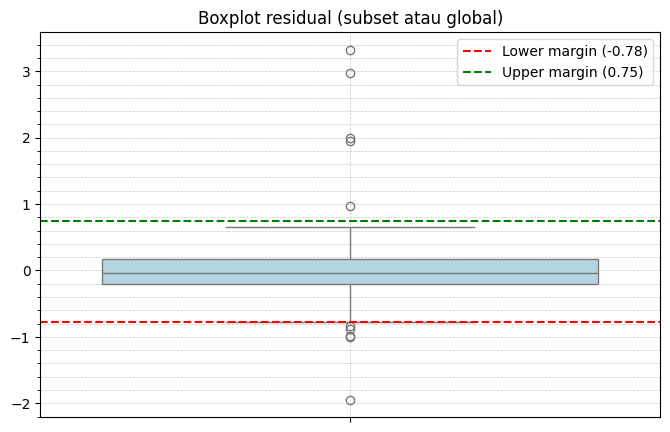

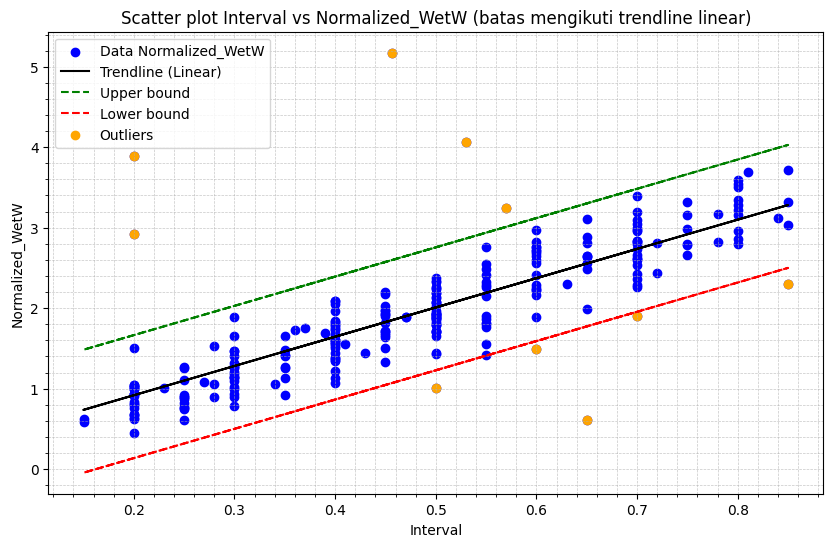

,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred,Outlier_Status
966,CS7210118,Bintangor Blok 2 Spasi 50,BINTANGOR,1.0,1.35,0.35,1.0,1.272,48.270,0.658,ESAP,None,ESAP,SAP,1.243068,0.643033,1.272,1.463652,Normal
972,CD500074,BINTANGOR BARAT UTARA,BINTANGOR,1.0,1.75,0.75,1.0,2.979,41.793,1.734,ESAP,None,ESAP,SAP,1.358579,0.790794,2.979,2.918074,Normal
1953,CS7210119,Bintangor Blok 2 Spasi 50,BINTANGOR,1.9,2.10,0.20,1.0,0.678,50.442,0.336,ESAP,None,ESAP,SAP,1.159512,0.574626,0.678,0.918244,Normal
1963,CD500080,BINTANGOR BARAT UTARA,BINTANGOR,2.0,2.20,0.20,1.0,0.633,42.338,0.365,ESAP,None,ESAP,SAP,1.082554,0.624221,0.633,0.918244,Normal
1964,CD500090,BINTANGOR BARAT UTARA,BINTANGOR,2.0,2.65,0.65,1.0,2.815,37.300,1.765,ESAP,None,ESAP,SAP,1.481292,0.928768,2.815,2.554468,Normal
1969,CD500089,BINTANGOR BARAT UTARA,BINTANGOR,2.0,2.50,0.50,1.0,2.240,41.518,1.310,ESAP,None,ESAP,SAP,1.532335,0.896142,2.240,2.009060,Normal
1970,CD500088,BINTANGOR BARAT UTARA,BINTANGOR,2.0,2.70,0.70,1.0,3.100,34.677,2.025,ESAP,None,ESAP,SAP,1.514744,0.989470,3.100,2.736271,Normal
1971,CD500064,BINTANGOR BARAT UTARA,BINTANGOR,2.0,2.70,0.70,1.0,2.835,45.855,1.535,ESAP,None,ESAP,SAP,1.385258,0.750043,2.835,2.736271,Normal
2699,CS7210353,Bintangor Blok 1 Spasi 50,BINTANGOR,2.0,2.50,0.50,1.0,2.140,30.374,1.490,ESAP,None,SAP,SAP,1.463927,1.019276,2.140,2.009060,Normal
2742,CD500096,BINTANGOR BARAT UTARA,BINTANGOR,2.3,3.00,0.70,1.0,2.955,27.411,2.145,ESAP,None,ESAP,SAP,1.443893,1.048105,2.955,2.736271,Normal


In [352]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from sklearn.linear_model import LinearRegression

def detect_outliers_normalized_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00):
    # --- Filter subset sesuai kriteria ---
    subset = df_recovery[(df_recovery['Interval'] == interval_value) &
                         (df_recovery['CoreRec'] == coreRec_value)]

    # --- Fit trendline linear (Interval vs Normalized_WetW) ---
    X = df_recovery['Interval'].values.reshape(-1,1)
    y = df_recovery['Normalized_WetW'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    # --- Tentukan subset untuk residual ---
    if subset.empty:
        print(f"Tidak ada data dengan Interval={interval_value} dan CoreRec={coreRec_value}.")
        print("Menggunakan seluruh data sebagai acuan residual.")
        subset_X = X
        subset_y = y
    else:
        subset_X = subset['Interval'].values.reshape(-1,1)
        subset_y = subset['Normalized_WetW'].values

    subset_pred = model.predict(subset_X)
    residuals = subset_y - subset_pred

    # --- Hitung IQR residual subset/global ---
    q1, q3 = np.percentile(residuals, [25, 75])
    iqr = q3 - q1
    lower_margin = q1 - 1.5 * iqr
    upper_margin = q3 + 1.5 * iqr

    print(f"\nResidual IQR acuan:")
    print(f"Q1: {q1:.3f}, Q3: {q3:.3f}, IQR: {iqr:.3f}")
    print(f"Lower margin: {lower_margin:.3f}, Upper margin: {upper_margin:.3f}")

    # --- Tambahkan kolom status outlier ---
    def classify_outlier(val, pred):
        if val < pred + lower_margin:
            return "Outlier bawah"
        elif val > pred + upper_margin:
            return "Outlier atas"
        else:
            return "Normal"

    df_recovery['Trendline_Pred'] = model.predict(df_recovery['Interval'].values.reshape(-1,1))
    df_recovery['Outlier_Status'] = [
        classify_outlier(val, pred)
        for val, pred in zip(df_recovery['Normalized_WetW'], df_recovery['Trendline_Pred'])
    ]

    # --- Boxplot residual subset/global ---
    plt.figure(figsize=(8,5))
    sns.boxplot(y=residuals, color='lightblue')
    plt.axhline(lower_margin, color='red', linestyle='--', label=f'Lower margin ({lower_margin:.2f})')
    plt.axhline(upper_margin, color='green', linestyle='--', label=f'Upper margin ({upper_margin:.2f})')
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Boxplot residual (subset atau global)")
    plt.legend()
    plt.show()

    # --- Scatter plot seluruh data + trendline + batas mengikuti trendline ---
    plt.figure(figsize=(10,6))
    plt.scatter(df_recovery['Interval'], df_recovery['Normalized_WetW'], color='blue', label='Data Normalized_WetW')
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'], color='black', label='Trendline (Linear)')

    # Batas atas/bawah mengikuti trendline
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'] + upper_margin,
             color='green', linestyle='--', label='Upper bound')
    plt.plot(df_recovery['Interval'], df_recovery['Trendline_Pred'] + lower_margin,
             color='red', linestyle='--', label='Lower bound')

    # Outlier ditandai oranye
    outliers = df_recovery[df_recovery['Outlier_Status'] != "Normal"]
    if not outliers.empty:
        plt.scatter(outliers['Interval'], outliers['Normalized_WetW'], color='orange', label='Outliers')

    plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
    plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title("Scatter plot Interval vs Normalized_WetW (batas mengikuti trendline linear)")
    plt.xlabel("Interval")
    plt.ylabel("Normalized_WetW")
    plt.legend()
    plt.show()

    return df_recovery

# --- Contoh pemanggilan ---
df_recovery = detect_outliers_normalized_wetw_trend(df_recovery, interval_value=1.00, coreRec_value=1.00)
display(df_recovery.head(15))


Bin calculation:
Freedman–Diaconis -> bins=13, width=0.376227
Sturges -> bins=10, width=0.472800


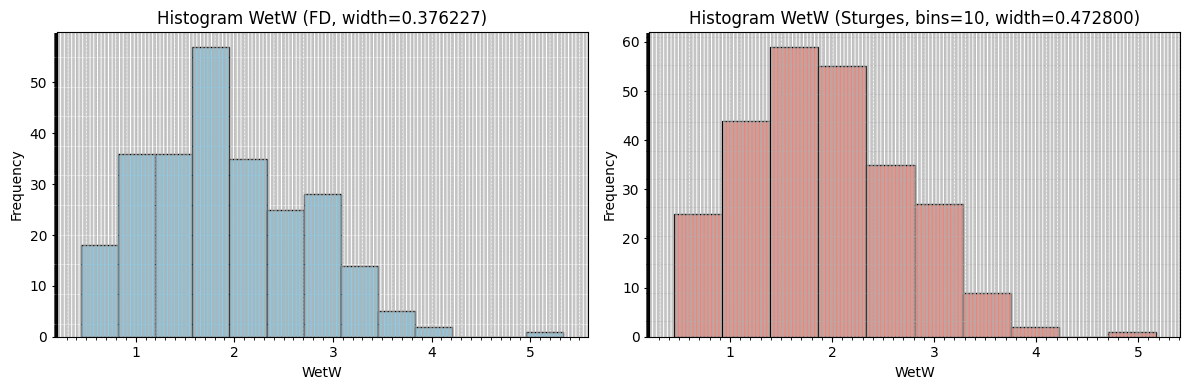


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.446000,0.822227,18
1,0.822227,1.198454,36
2,1.198454,1.574681,36
3,1.574681,1.950909,57
4,1.950909,2.327136,35
5,2.327136,2.703363,25
6,2.703363,3.079590,28
7,3.079590,3.455817,14
8,3.455817,3.832044,5
9,3.832044,4.208272,2



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.4460,0.9188,25
1,0.9188,1.3916,44
2,1.3916,1.8644,59
3,1.8644,2.3372,55
4,2.3372,2.8100,35
5,2.8100,3.2828,27
6,3.2828,3.7556,9
7,3.7556,4.2284,2
8,4.2284,4.7012,0
9,4.7012,5.1740,1


In [353]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def analyze_wetw(df_recovery):
    if 'WetW' not in df_recovery.columns:
        print("Kolom 'WetW' tidak ada di dataframe.")
        return

    data = df_recovery['WetW'].dropna()
    if data.empty:
        print("Tidak ada data 'WetW' yang valid setelah drop NaN.")
        return

    # --- hitung jumlah bins ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram WetW (FD, width={width_fd_str})")
    axes[0].set_xlabel("WetW")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram WetW (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("WetW")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
wetw_data = analyze_wetw(df_recovery)

In [354]:
import numpy as np
from IPython.display import display

def filter_wetw_normal(df_recovery, lower_bound, upper_bound):
    """
    Filter data WetW berdasarkan batas bawah/atas,
    sekaligus memastikan hanya baris dengan Outlier_Status = 'Normal' yang lolos.
    Setelah selesai, kolom Outlier_Status dihapus.
    """
    # --- Filter berdasarkan WetW ---
    df_wetw = df_recovery[(df_recovery['WetW'] >= lower_bound) &
                          (df_recovery['WetW'] <= upper_bound)].copy()

    # --- Pastikan hanya baris Normal yang lolos ---
    if 'Outlier_Status' in df_wetw.columns:
        df_wetw = df_wetw[df_wetw['Outlier_Status'] == "Normal"].copy()
        # Drop kolom Outlier_Status setelah selesai
        df_wetw = df_wetw.drop(columns=['Outlier_Status'])
    else:
        print("Kolom Outlier_Status tidak ditemukan, hanya filter WetW yang diterapkan.")

    print(f"\nFiltered rows (Normal only): {len(df_wetw)}")
    display(df_wetw.head(10))

    return df_wetw

# --- Contoh pemanggilan ---
lower_bound = float(input("Masukkan batas bawah (>=): "))
upper_bound = float(input("Masukkan batas atas (<=): "))

df_wetw = filter_wetw_normal(df_recovery, lower_bound, upper_bound)

Masukkan batas bawah (>=): 0.822227
Masukkan batas atas (<=): 3.079590

Filtered rows (Normal only): 212


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
966,CS7210118,Bintangor Blok 2 Spasi 50,BINTANGOR,1.0,1.35,0.35,1.0,1.272,48.270,0.658,ESAP,None,ESAP,SAP,1.243068,0.643033,1.272,1.463652
972,CD500074,BINTANGOR BARAT UTARA,BINTANGOR,1.0,1.75,0.75,1.0,2.979,41.793,1.734,ESAP,None,ESAP,SAP,1.358579,0.790794,2.979,2.918074
1964,CD500090,BINTANGOR BARAT UTARA,BINTANGOR,2.0,2.65,0.65,1.0,2.815,37.300,1.765,ESAP,None,ESAP,SAP,1.481292,0.928768,2.815,2.554468
1969,CD500089,BINTANGOR BARAT UTARA,BINTANGOR,2.0,2.50,0.50,1.0,2.240,41.518,1.310,ESAP,None,ESAP,SAP,1.532335,0.896142,2.240,2.009060
1971,CD500064,BINTANGOR BARAT UTARA,BINTANGOR,2.0,2.70,0.70,1.0,2.835,45.855,1.535,ESAP,None,ESAP,SAP,1.385258,0.750043,2.835,2.736271
2699,CS7210353,Bintangor Blok 1 Spasi 50,BINTANGOR,2.0,2.50,0.50,1.0,2.140,30.374,1.490,ESAP,None,SAP,SAP,1.463927,1.019276,2.140,2.009060
2742,CD500096,BINTANGOR BARAT UTARA,BINTANGOR,2.3,3.00,0.70,1.0,2.955,27.411,2.145,ESAP,None,ESAP,SAP,1.443893,1.048105,2.955,2.736271
2803,CS6210146,Bintangor Blok 2 Spasi 25,BINTANGOR,2.5,3.00,0.50,1.0,2.322,35.831,1.490,ESAP,None,ESAP,SAP,1.588429,1.019276,2.322,2.009060
2917,CD500217,BINTANGOR BARAT UTARA,BINTANGOR,2.7,3.00,0.30,1.0,1.093,54.529,0.497,ESAP,None,ESAP,SAP,1.246162,0.566645,1.093,1.281849
2919,CS7210343,Bintangor Blok 1 Spasi 50,BINTANGOR,2.7,3.40,0.70,1.0,3.046,42.810,1.742,ESAP,None,ESAP,SAP,1.488358,0.851189,3.046,2.736271


#Filter By MC


Descriptive statistics for H2O:
Count: 212
Mean: 44.346967
Standard Error: 0.712089
Median: 45.725
Mode: 50.998
Standard Deviation: 10.368172
Sample Variance: 107.498985
Kurtosis: 0.680428
Skewness: -0.235063
Range: 70.642
Minimum: 12.411
Maximum: 83.053
Sum: 9401.557
Confidence Level (95%): ±1.403720

Bin calculation:
Freedman–Diaconis -> bins=17, width=4.280085
Sturges -> bins=9, width=7.849111


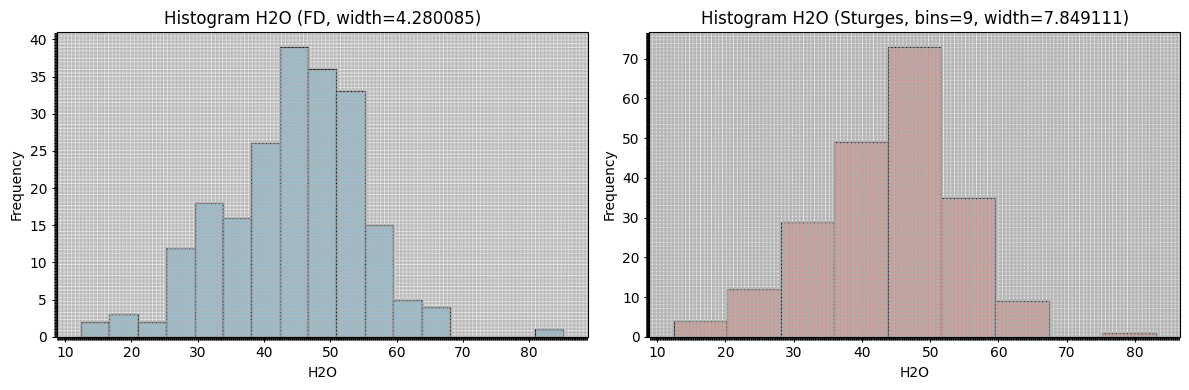


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,12.411000,16.691085,2
1,16.691085,20.971170,3
2,20.971170,25.251255,2
3,25.251255,29.531340,12
4,29.531340,33.811425,18
5,33.811425,38.091510,16
6,38.091510,42.371595,26
7,42.371595,46.651681,39
8,46.651681,50.931766,36
9,50.931766,55.211851,33



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,12.411000,20.260111,4
1,20.260111,28.109222,12
2,28.109222,35.958333,29
3,35.958333,43.807444,49
4,43.807444,51.656556,73
5,51.656556,59.505667,35
6,59.505667,67.354778,9
7,67.354778,75.203889,0
8,75.203889,83.053000,1


In [355]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="H2O"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_h2o(df_wetw):
    if 'H2O' not in df_wetw.columns:
        print("Kolom 'H2O' tidak ada di dataframe.")
        return

    data = df_wetw['H2O'].dropna()
    if data.empty:
        print("Tidak ada data 'H2O' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="H2O")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks interval 0.1 ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram H2O (FD, width={width_fd_str})")
    axes[0].set_xlabel("H2O")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram H2O (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("H2O")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
h2o_data = analyze_h2o(df_wetw)

In [356]:

import numpy as np
from IPython.display import display

# Input batas bawah dan atas untuk H2O
lower_bound = float(input("is greater than or equal to: "))
upper_bound = float(input("is less than or equal to: "))

# Filter df_wetw berdasarkan H2O
df_h2o = df_wetw[(df_wetw['H2O'] >= lower_bound) &
                 (df_wetw['H2O'] <= upper_bound)].copy()

print(f"\nFiltered rows (H2O): {len(df_h2o)}")
display(df_h2o.head(10))

is greater than or equal to: 29.531340
is less than or equal to: 59.491936

Filtered rows (H2O): 183


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
966,CS7210118,Bintangor Blok 2 Spasi 50,BINTANGOR,1.0,1.35,0.35,1.0,1.272,48.270,0.658,ESAP,None,ESAP,SAP,1.243068,0.643033,1.272,1.463652
972,CD500074,BINTANGOR BARAT UTARA,BINTANGOR,1.0,1.75,0.75,1.0,2.979,41.793,1.734,ESAP,None,ESAP,SAP,1.358579,0.790794,2.979,2.918074
1964,CD500090,BINTANGOR BARAT UTARA,BINTANGOR,2.0,2.65,0.65,1.0,2.815,37.300,1.765,ESAP,None,ESAP,SAP,1.481292,0.928768,2.815,2.554468
1969,CD500089,BINTANGOR BARAT UTARA,BINTANGOR,2.0,2.50,0.50,1.0,2.240,41.518,1.310,ESAP,None,ESAP,SAP,1.532335,0.896142,2.240,2.009060
1971,CD500064,BINTANGOR BARAT UTARA,BINTANGOR,2.0,2.70,0.70,1.0,2.835,45.855,1.535,ESAP,None,ESAP,SAP,1.385258,0.750043,2.835,2.736271
2699,CS7210353,Bintangor Blok 1 Spasi 50,BINTANGOR,2.0,2.50,0.50,1.0,2.140,30.374,1.490,ESAP,None,SAP,SAP,1.463927,1.019276,2.140,2.009060
2803,CS6210146,Bintangor Blok 2 Spasi 25,BINTANGOR,2.5,3.00,0.50,1.0,2.322,35.831,1.490,ESAP,None,ESAP,SAP,1.588429,1.019276,2.322,2.009060
2917,CD500217,BINTANGOR BARAT UTARA,BINTANGOR,2.7,3.00,0.30,1.0,1.093,54.529,0.497,ESAP,None,ESAP,SAP,1.246162,0.566645,1.093,1.281849
2919,CS7210343,Bintangor Blok 1 Spasi 50,BINTANGOR,2.7,3.40,0.70,1.0,3.046,42.810,1.742,ESAP,None,ESAP,SAP,1.488358,0.851189,3.046,2.736271
2930,CD500148,BINTANGOR BARAT SELATAN,BINTANGOR,2.7,3.00,0.30,1.0,0.995,34.573,0.651,ESAP,None,SAP,SAP,1.134429,0.742225,0.995,1.281849


# Filter By DTF


Descriptive statistics for DTF:
Count: 183
Mean: 0.758394
Standard Error: 0.012086
Median: 0.74222472
Mode: 0.693655176
Standard Deviation: 0.163497
Sample Variance: 0.026731
Kurtosis: -0.464945
Skewness: 0.394504
Range: 0.752485891
Minimum: 0.41728763
Maximum: 1.169773521
Sum: 138.786124625
Confidence Level (95%): ±0.023847

Bin calculation:
Freedman–Diaconis -> bins=10, width=0.080540
Sturges -> bins=9, width=0.083610


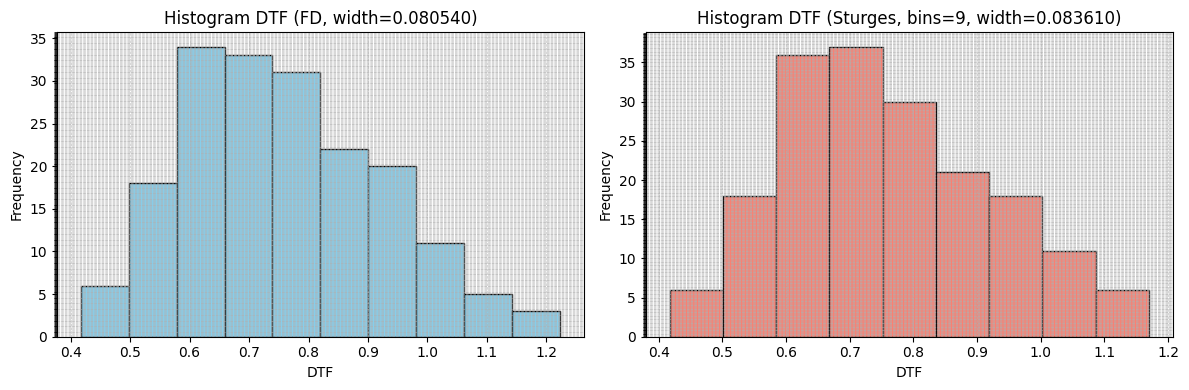


Tabel Histogram (Freedman–Diaconis):


,Bin Start,Bin End,Frequency
0,0.417288,0.497828,6
1,0.497828,0.578367,18
2,0.578367,0.658907,34
3,0.658907,0.739447,33
4,0.739447,0.819987,31
5,0.819987,0.900527,22
6,0.900527,0.981067,20
7,0.981067,1.061607,11
8,1.061607,1.142147,5
9,1.142147,1.222687,3



Tabel Histogram (Sturges):


,Bin Start,Bin End,Frequency
0,0.417288,0.500897,6
1,0.500897,0.584507,18
2,0.584507,0.668116,36
3,0.668116,0.751726,37
4,0.751726,0.835335,30
5,0.835335,0.918945,21
6,0.918945,1.002554,18
7,1.002554,1.086164,11
8,1.086164,1.169774,6


In [358]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
from matplotlib.ticker import MultipleLocator

def compute_bins(series, method='fd'):
    data = series.dropna().values
    n = len(data)
    if n < 2:
        return 10, None
    if method == 'fd':
        q75, q25 = np.percentile(data, [75, 25])
        iqr = q75 - q25
        if iqr == 0:
            return max(5, int(np.sqrt(n))), None
        h = 2 * iqr / (n ** (1/3))   # Freedman–Diaconis bin width
        bins = max(5, int(np.ceil((data.max() - data.min()) / h)))
        return bins, h
    elif method == 'sturges':
        if n == 0 or (data.max() - data.min()) == 0:
            return max(5, int(np.sqrt(n))), None
        bins = int(np.ceil(np.log2(n) + 1))
        h = (data.max() - data.min()) / bins
        return bins, h
    else:
        return 10, None

def descriptive_stats(series, label="DTF"):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

def analyze_dtf(df_h2o):
    if 'DTF' not in df_h2o.columns:
        print("Kolom 'DTF' tidak ada di dataframe.")
        return

    data = df_h2o['DTF'].dropna()
    if data.empty:
        print("Tidak ada data 'DTF' yang valid setelah drop NaN.")
        return

    # --- tampilkan descriptive statistics ---
    descriptive_stats(data, label="DTF")

    # --- hitung jumlah bins dan bin width ---
    bins_fd, h_fd = compute_bins(data, method='fd')
    bins_st, h_st = compute_bins(data, method='sturges')

    width_fd_str = f"{h_fd:.6f}" if h_fd is not None else "N/A"
    width_st_str = f"{h_st:.6f}" if h_st is not None else "N/A"

    print("\nBin calculation:")
    print(f"Freedman–Diaconis -> bins={bins_fd}, width={width_fd_str}")
    print(f"Sturges -> bins={bins_st}, width={width_st_str}")

    # --- plot histogram dengan minor ticks interval 0.1 ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Freedman–Diaconis pakai edges manual agar width konsisten
    if h_fd is not None and h_fd > 0:
        edges_fd = np.arange(data.min(), data.max() + h_fd, h_fd)
    else:
        edges_fd = np.linspace(data.min(), data.max(), bins_fd+1)

    counts_fd, edges_fd, _ = axes[0].hist(data, bins=edges_fd, color='skyblue', edgecolor='black')
    axes[0].set_title(f"Histogram DTF (FD, width={width_fd_str})")
    axes[0].set_xlabel("DTF")
    axes[0].set_ylabel("Frequency")
    axes[0].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[0].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    # Sturges pakai jumlah bin
    counts_st, edges_st, _ = axes[1].hist(data, bins=bins_st, color='salmon', edgecolor='black')
    axes[1].set_title(f"Histogram DTF (Sturges, bins={bins_st}, width={width_st_str})")
    axes[1].set_xlabel("DTF")
    axes[1].set_ylabel("Frequency")
    axes[1].xaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].yaxis.set_minor_locator(MultipleLocator(0.1))
    axes[1].grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

    # --- buat tabel histogram ---
    table_fd = pd.DataFrame({
        "Bin Start": edges_fd[:-1],
        "Bin End": edges_fd[1:],
        "Frequency": counts_fd.astype(int)
    })

    table_st = pd.DataFrame({
        "Bin Start": edges_st[:-1],
        "Bin End": edges_st[1:],
        "Frequency": counts_st.astype(int)
    })

    print("\nTabel Histogram (Freedman–Diaconis):")
    display(table_fd)

    print("\nTabel Histogram (Sturges):")
    display(table_st)

    return data

# --- Contoh pemanggilan ---
dtf_data = analyze_dtf(df_h2o)

In [359]:
import numpy as np
from IPython.display import display

# Input batas bawah dan atas untuk H2O
lower_bound = float(input("is greater than or equal to: "))
upper_bound = float(input("is less than or equal to: "))

# Filter df_h2o berdasarkan DTF
df_dtf = df_h2o[(df_h2o['DTF'] >= lower_bound) &
                (df_h2o['DTF'] <= upper_bound)].copy()

print(f"\nFiltered rows (DTF): {len(df_dtf)}")
display(df_dtf.head(400))

is greater than or equal to: 0.500897
is less than or equal to: 1.002554

Filtered rows (DTF): 160


,HoleId,Hill,Hill_Group,From,To,Interval,CoreRec,WetW,H2O,DryW,Material,Layer,NEW_LYR,GEN_LYR,WTF,DTF,Normalized_WetW,Trendline_Pred
966,CS7210118,Bintangor Blok 2 Spasi 50,BINTANGOR,1.00,1.35,0.35,1.0,1.272,48.270,0.658,ESAP,None,ESAP,SAP,1.243068,0.643033,1.272,1.463652
972,CD500074,BINTANGOR BARAT UTARA,BINTANGOR,1.00,1.75,0.75,1.0,2.979,41.793,1.734,ESAP,None,ESAP,SAP,1.358579,0.790794,2.979,2.918074
1964,CD500090,BINTANGOR BARAT UTARA,BINTANGOR,2.00,2.65,0.65,1.0,2.815,37.300,1.765,ESAP,None,ESAP,SAP,1.481292,0.928768,2.815,2.554468
1969,CD500089,BINTANGOR BARAT UTARA,BINTANGOR,2.00,2.50,0.50,1.0,2.240,41.518,1.310,ESAP,None,ESAP,SAP,1.532335,0.896142,2.240,2.009060
1971,CD500064,BINTANGOR BARAT UTARA,BINTANGOR,2.00,2.70,0.70,1.0,2.835,45.855,1.535,ESAP,None,ESAP,SAP,1.385258,0.750043,2.835,2.736271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11036,CS6210046R,Bintangor Blok 2 Spasi 25,BINTANGOR,13.00,13.60,0.60,1.0,2.758,50.254,1.372,ESAP,None,ESAP,SAP,1.572239,0.782129,2.758,2.372666
11097,CS6210046R,Bintangor Blok 2 Spasi 25,BINTANGOR,13.60,14.00,0.40,1.0,1.960,53.980,0.902,ESAP,None,ESAP,SAP,1.675991,0.771298,1.960,1.645455
11103,CS7210170,Bintangor Blok 1 Spasi 50,BINTANGOR,13.65,13.95,0.30,1.0,1.265,50.988,0.620,ESAP,None,ESAP,SAP,1.442265,0.706881,1.265,1.281849
11202,CS6210046R,Bintangor Blok 2 Spasi 25,BINTANGOR,14.00,14.65,0.65,1.0,2.652,46.305,1.424,ESAP,None,ESAP,SAP,1.395519,0.749329,2.652,2.554468


# SUMMARY

In [360]:
import numpy as np
import scipy.stats as stats

def descriptive_stats(series, label):
    data = series.dropna().values
    n = len(data)
    if n == 0:
        print(f"\nNo data available for {label}.")
        return

    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else np.nan
    se = stats.sem(data) if n > 1 else np.nan
    median = np.median(data)
    mode = stats.mode(data, keepdims=True).mode[0]
    var = np.var(data, ddof=1) if n > 1 else np.nan
    kurt = stats.kurtosis(data) if n > 3 else np.nan
    skew = stats.skew(data) if n > 2 else np.nan
    rng = np.max(data) - np.min(data)
    conf95 = stats.t.ppf(0.975, n-1) * se if n > 1 else np.nan

    print(f"\nDescriptive statistics for {label}:")
    print(f"Count: {n}")
    print(f"Mean: {mean:.6f}")
    print(f"Standard Error: {se:.6f}" if not np.isnan(se) else "Standard Error: N/A")
    print(f"Median: {median}")
    print(f"Mode: {mode}")
    print(f"Standard Deviation: {std:.6f}" if not np.isnan(std) else "Standard Deviation: N/A")
    print(f"Sample Variance: {var:.6f}" if not np.isnan(var) else "Sample Variance: N/A")
    print(f"Kurtosis: {kurt:.6f}" if not np.isnan(kurt) else "Kurtosis: N/A")
    print(f"Skewness: {skew:.6f}" if not np.isnan(skew) else "Skewness: N/A")
    print(f"Range: {rng}")
    print(f"Minimum: {np.min(data)}")
    print(f"Maximum: {np.max(data)}")
    print(f"Sum: {np.sum(data)}")
    print(f"Confidence Level (95%): ±{conf95:.6f}" if not np.isnan(conf95) else "Confidence Level (95%): N/A")

# --- Jalankan untuk semua kolom yang diminta ---
target_columns = ["Interval", "CoreRec", "WetW", "H2O", "DryW", "WTF", "DTF"]

for col in target_columns:
    if col in df_dtf.columns:
        descriptive_stats(df_dtf[col], label=col)
    else:
        print(f"\nKolom {col} tidak ditemukan di df_dtf.")


Descriptive statistics for Interval:
Count: 160
Mean: 0.479938
Standard Error: 0.012171
Median: 0.5
Mode: 0.5
Standard Deviation: 0.153952
Sample Variance: 0.023701
Kurtosis: -0.708651
Skewness: 0.146118
Range: 0.6499999999999999
Minimum: 0.2
Maximum: 0.85
Sum: 76.79
Confidence Level (95%): ±0.024038

Descriptive statistics for CoreRec:
Count: 160
Mean: 1.000375
Standard Error: 0.000975
Median: 1.0
Mode: 1.0
Standard Deviation: 0.012331
Sample Variance: 0.000152
Kurtosis: 16.951682
Skewness: 0.958232
Range: 0.1200000000000001
Minimum: 0.95
Maximum: 1.07
Sum: 160.06
Confidence Level (95%): ±0.001925

Descriptive statistics for WetW:
Count: 160
Mean: 1.890175
Standard Error: 0.046794
Median: 1.8695
Mode: 1.72
Standard Deviation: 0.591905
Sample Variance: 0.350352
Kurtosis: -0.923855
Skewness: 0.132625
Range: 2.2159999999999997
Minimum: 0.83
Maximum: 3.046
Sum: 302.428
Confidence Level (95%): ±0.092418

Descriptive statistics for H2O:
Count: 160
Mean: 45.897375
Standard Error: 0.524913
M

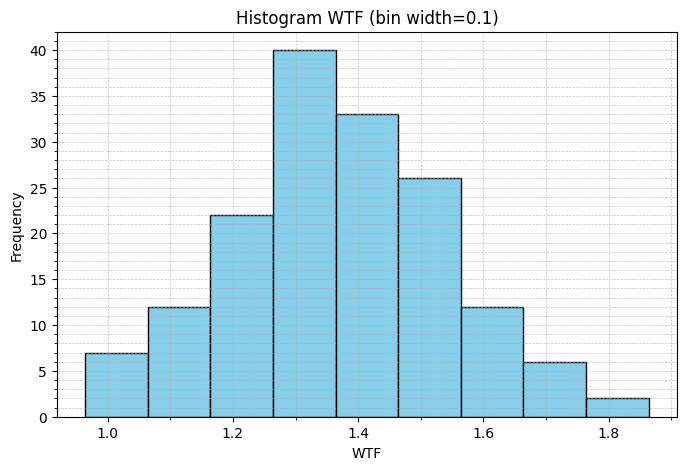


Tabel Histogram WTF:


,Bin Start,Bin End,Frequency
0,0.963928,1.063928,7
1,1.063928,1.163928,12
2,1.163928,1.263928,22
3,1.263928,1.363928,40
4,1.363928,1.463928,33
5,1.463928,1.563928,26
6,1.563928,1.663928,12
7,1.663928,1.763928,6
8,1.763928,1.863928,2


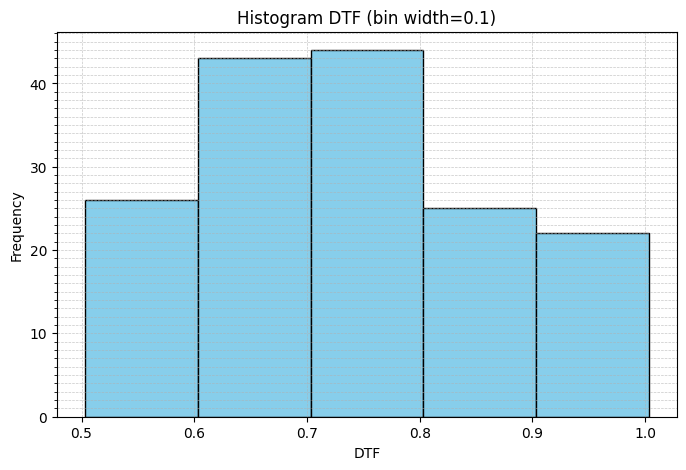


Tabel Histogram DTF:


,Bin Start,Bin End,Frequency
0,0.503177,0.603177,26
1,0.603177,0.703177,43
2,0.703177,0.803177,44
3,0.803177,0.903177,25
4,0.903177,1.003177,22


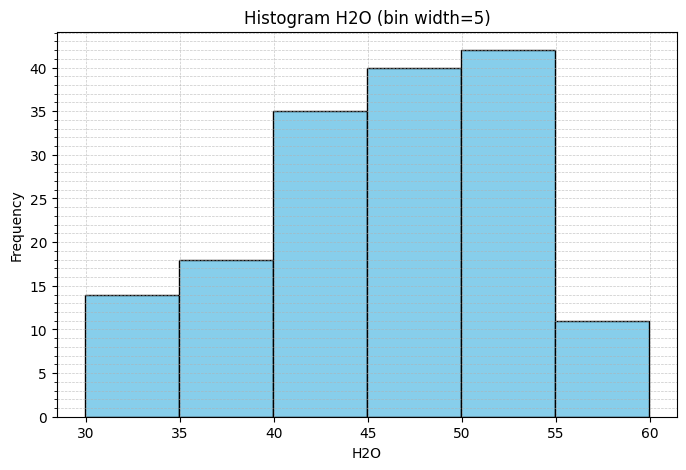


Tabel Histogram H2O:


,Bin Start,Bin End,Frequency
0,29.954,34.954,14
1,34.954,39.954,18
2,39.954,44.954,35
3,44.954,49.954,40
4,49.954,54.954,42
5,54.954,59.954,11


In [361]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MultipleLocator

def plot_histogram_fixed_width(series, bin_width, label):
    data = series.dropna().values
    if len(data) == 0:
        print(f"Tidak ada data untuk {label}.")
        return None

    # Tentukan bins berdasarkan bin_width
    min_val, max_val = data.min(), data.max()
    bins = np.arange(min_val, max_val + bin_width, bin_width)

    # Plot histogram
    plt.figure(figsize=(8,5))
    counts, edges, _ = plt.hist(data, bins=bins, color='skyblue', edgecolor='black')
    plt.title(f"Histogram {label} (bin width={bin_width})")
    plt.xlabel(label)
    plt.ylabel("Frequency")

    # Minor ticks sesuai bin width
    plt.gca().xaxis.set_minor_locator(MultipleLocator(bin_width))
    plt.gca().yaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.show()

    # Buat tabel histogram
    table = pd.DataFrame({
        "Bin Start": edges[:-1],
        "Bin End": edges[1:],
        "Frequency": counts.astype(int)
    })

    print(f"\nTabel Histogram {label}:")
    display(table)
    return table

# --- Contoh pemanggilan ---
table_wtf = plot_histogram_fixed_width(df_dtf['WTF'], bin_width=0.1, label="WTF")
table_dtf = plot_histogram_fixed_width(df_dtf['DTF'], bin_width=0.1, label="DTF")
table_h2o = plot_histogram_fixed_width(df_dtf['H2O'], bin_width=5, label="H2O")

In [362]:
import pandas as pd

# Input nama Block, GEN_LYR, dan Material
block_name = input("Masukkan nama Block: ")
gen_lyr = input("Masukkan GEN_LYR: ")
material = input("Masukkan Material: ")

# Hitung nilai ringkasan (contoh: mean)
summary = {
    "Block": block_name,
    "GEN_LYR": gen_lyr,
    "Material": material,
    "Interval_mean": df_dtf['Interval'].dropna().mean(),
    "CoreRec_mean": df_dtf['CoreRec'].dropna().mean(),
    "WetW_mean": df_dtf['WetW'].dropna().mean(),
    "H2O_mean": df_dtf['H2O'].dropna().mean(),
    "DryW_mean": df_dtf['DryW'].dropna().mean(),
    "WTF_mean": df_dtf['WTF'].dropna().mean(),
    "DTF_mean": df_dtf['DTF'].dropna().mean()
}

# Buat nama variabel DataFrame sesuai input
var_name = f"df_{block_name.replace(' ', '_').lower()}_{gen_lyr.lower()}_{material.lower()}"
globals()[var_name] = pd.DataFrame([summary])

print(f"\nTabel Ringkasan tersimpan sebagai variabel: {var_name}")
display(globals()[var_name])

Masukkan nama Block: Bintangor
Masukkan GEN_LYR: SAP
Masukkan Material: ESAP

Tabel Ringkasan tersimpan sebagai variabel: df_bintangor_sap_esap


,Block,GEN_LYR,Material,Interval_mean,CoreRec_mean,WetW_mean,H2O_mean,DryW_mean,WTF_mean,DTF_mean
0,Bintangor,SAP,ESAP,0.479938,1.000375,1.890175,45.897375,1.02485,1.362056,0.736354


# Proporsional Averaging

In [285]:
import pandas as pd

# Gabungkan semua DataFrame jadi satu
df_belambus_selatan_brk_all = pd.concat([
    df_belambus_selatan_brk_altspt,
    df_belambus_selatan_brk_althgt,
    df_belambus_selatan_brk_br,
    df_belambus_selatan_brk_dnt,
    df_belambus_selatan_brk_hgt,
    df_belambus_selatan_brk_hshgt,
    df_belambus_selatan_brk_spt
], ignore_index=True)

# Cek hasil
print(df_belambus_selatan_brk_all.shape)
display(df_belambus_selatan_brk_all.head())

(7, 10)


,Block,GEN_LYR,Material,Interval_mean,CoreRec_mean,WetW_mean,H2O_mean,DryW_mean,WTF_mean,DTF_mean
0,Belambus Selatan,BRK,ALT SPT,1.0,1.0,5.582000,8.883250,5.087000,1.903017,1.734262
1,Belambus Selatan,BRK,ALT-HGT,1.0,1.0,4.986667,3.139333,4.830000,1.700056,1.646645
2,Belambus Selatan,BRK,BR,1.0,1.0,5.229444,3.667778,5.036667,1.782824,1.717102
3,Belambus Selatan,BRK,DNT,1.0,1.0,6.222750,2.146750,6.089000,2.128423,2.082676
4,Belambus Selatan,BRK,HGT,1.0,1.0,5.497500,3.130750,5.325500,1.877266,1.818528


In [286]:
# Daftar material yang memang ada di hasil filter
materials_filter = df_belambus_selatan_brk_all['Material'].unique().tolist()

# Initialize df_raw with the df_block DataFrame
df_raw = df_block.copy()

# Filter raw data hanya untuk material yang relevan
df_raw_filtered = df_raw[df_raw['Material'].isin(materials_filter)]

# Hitung jumlah raw per material
raw_counts = df_raw_filtered['Material'].value_counts().reset_index()
raw_counts.columns = ['Material', 'Raw_Count']

# Hitung jumlah hasil filter per material
filtered_counts = df_belambus_selatan_brk_all['Material'].value_counts().reset_index()
filtered_counts.columns = ['Material', 'Filtered_Count']

# Gabungkan
summary = pd.merge(raw_counts, filtered_counts, on='Material', how='inner')

# Hitung persentase proporsi tiap material terhadap total raw relevan
summary['Percentage_of_Total'] = (summary['Raw_Count'] / summary['Raw_Count'].sum()) * 100

print("\nSummary per Material (hanya material relevan):")
display(summary)


Summary per Material (hanya material relevan):


,Material,Raw_Count,Filtered_Count,Percentage_of_Total
0,BR,44,1,23.783784
1,SPT,36,1,19.459459
2,HGT,35,1,18.918919
3,ALT SPT,23,1,12.432432
4,HS HGT,21,1,11.351351
5,DNT,16,1,8.648649
6,ALT-HGT,10,1,5.405405


In [287]:
import numpy as np
import pandas as pd

# --- 1. Buat mapping material -> proporsi (dari summary yang sudah dihitung sebelumnya) ---
weights_map = summary.set_index('Material')['Percentage_of_Total'] / 100.0

# --- 2. Fungsi untuk weighted descriptive statistics ---
def weighted_means(df, weights_map):
    stats = {}
    for col in ['Interval_mean','CoreRec_mean','WetW_mean','H2O_mean','DryW_mean','WTF_mean','DTF_mean']:
        values = df[col].values
        # Ambil bobot sesuai material tiap baris
        w = df['Material'].map(weights_map).values

        # Weighted mean
        mean = np.average(values, weights=w)

        # Simpan hasil
        stats[col] = mean

    return pd.DataFrame([stats])

# --- 3. Hitung descriptive statistics proporsional ---
summary_means = weighted_means(df_belambus_selatan_brk_all, weights_map)

print("\nDescriptive Statistics Proporsional (Material, Weighted Means):")
display(summary_means)


Descriptive Statistics Proporsional (Material, Weighted Means):


,Interval_mean,CoreRec_mean,WetW_mean,H2O_mean,DryW_mean,WTF_mean,DTF_mean
0,1.0,1.0,5.381342,4.451587,5.144737,1.836069,1.755359
